In [25]:
#import dependencies
import tweepy 
import json
import numpy 
import pandas as pd #For Compound Scores DataFrame 
import matplotlib.pyplot as plt #For Plotting Compound scores and visualize data
import seaborn as sn #For visualizing data

#import and initialize analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Twitter API authentication keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

#Target Search Terms
target_term = ['@CNNbrk', '@BBC', '@nytimes', '@fox', '@CBSNews']

sentemint_score = []
#Function to add scores to DataFrame

def addScores(name):
    
    tweet_counter = 1
    #Grab 100 tweets with API
    public_tweets = api.search(name, count = 100, result_type = 'recent')
    
    #Loop to iterate through all public_tweets
    
    for tweet in public_tweets['statuses']:
        
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        negative = analyzer.polarity_scores(tweet["text"])["neg"]
        positive = analyzer.polarity_scores(tweet["text"])["pos"]
        neutral = analyzer.polarity_scores(tweet["text"])["neu"]
        text = tweet["text"]
        timestamp = tweet['user']["created_at"]
        sentemint_score.append({'Tweet': text , 
                                'Timestamp': timestamp,
                                'Compound_Scores': compound ,
                                'Positive_Scores': positive ,
                                'Negative_Scores': negative,
                                'Neutral_Scores': neutral, 
                                "news_org": name,
                                "tweet_count": tweet_counter} )
        tweet_counter+= 1
    return tweet_scores

Global_tweet_scores = addScores(target_term[0])
Global_tweet_scores
addScores(target_term[1])
addScores(target_term[2])
addScores(target_term[3])
addScores(target_term[4])

df = pd.DataFrame.from_dict(sentemint_score)    

df

,Compound_Scores,Negative_Scores,Neutral_Scores,Positive_Scores,Timestamp,Tweet,news_org,tweet_count
0,0.0000,0.000,1.000,0.000,Wed Jun 30 05:03:44 +0000 2010,RT @cnnbrk: Mitt Romney swipes at Trump in an ...,@CNNbrk,1
1,0.2023,0.084,0.798,0.118,Sat Apr 30 04:47:35 +0000 2011,RT @cnnbrk: South Africa will issue a diplomat...,@CNNbrk,2
2,-0.6486,0.163,0.837,0.000,Fri Oct 09 21:54:21 +0000 2009,RT @cnnbrk: Cranberries singer Dolores O'Riord...,@CNNbrk,3
3,-0.6486,0.163,0.837,0.000,Sun Mar 15 14:42:32 +0000 2009,RT @cnnbrk: Cranberries singer Dolores O'Riord...,@CNNbrk,4
4,-0.6486,0.163,0.837,0.000,Tue Apr 26 15:12:41 +0000 2011,RT @cnnbrk: Cranberries singer Dolores O'Riord...,@CNNbrk,5
5,0.0000,0.000,1.000,0.000,Wed Aug 17 17:43:41 +0000 2016,@cnnbrk This is the same guy who sought a job ...,@CNNbrk,6
6,0.3612,0.000,0.706,0.294,Sat Dec 01 13:46:28 +0000 2012,@cnnbrk Talks like an elitist...not a working man,@CNNbrk,7
7,-0.6486,0.163,0.837,0.000,Mon Oct 04 22:14:37 +0000 2010,RT @cnnbrk: Cranberries singer Dolores O'Riord...,@CNNbrk,8
8,-0.5994,0.308,0.692,0.000,Sat Apr 09 15:52:11 +0000 2016,@cnnbrk Would this count as a market crash?......,@CNNbrk,9
9,-0.5423,0.200,0.800,0.000,Tue Sep 26 19:02:21 +0000 2017,@graemenrodgers @Stevence2017 @BreakandEnterTV...,@CNNbrk,10


In [35]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)
    

     Compound_Scores  Negative_Scores  Neutral_Scores  Positive_Scores  \
0             0.0000            0.000           1.000            0.000   
1             0.2023            0.084           0.798            0.118   
2            -0.6486            0.163           0.837            0.000   
3            -0.6486            0.163           0.837            0.000   
4            -0.6486            0.163           0.837            0.000   
5             0.0000            0.000           1.000            0.000   
6             0.3612            0.000           0.706            0.294   
7            -0.6486            0.163           0.837            0.000   
8            -0.5994            0.308           0.692            0.000   
9            -0.5423            0.200           0.800            0.000   
10           -0.6486            0.163           0.837            0.000   
11            0.0000            0.000           1.000            0.000   
12            0.0000            0.000 

In [16]:
df.to_csv("News Sentement DataFrame.csv")

[{'Compound_Scores': 0.0258,
  'Negative_Scores': 0.107,
  'Neutral_Scores': 0.782,
  'Positive_Scores': 0.111,
  'Timestamp': 'Sat Dec 16 16:23:35 +0000 2017',
  'Tweet': '@cnnbrk Article may be T / F: Congress just drafted a bill to help Puerto Rico climb out of its severe economic cri… https://t.co/LXsBUEWVaE',
  'news_org': '@CNNbrk'},
 {'Compound_Scores': 0.0,
  'Negative_Scores': 0.0,
  'Neutral_Scores': 1.0,
  'Positive_Scores': 0.0,
  'Timestamp': 'Sun Oct 22 16:19:15 +0000 2017',
  'Tweet': '@SandiDastous @cnnbrk They have the same agent.',
  'news_org': '@CNNbrk'},
 {'Compound_Scores': -0.296,
  'Negative_Scores': 0.099,
  'Neutral_Scores': 0.901,
  'Positive_Scores': 0.0,
  'Timestamp': 'Fri Nov 13 16:17:23 +0000 2015',
  'Tweet': '@cnnbrk A Shithole is what you take into a Shithouse ... No difference btwn 2 words, when followed by "We Prefer folks from Norway"',
  'news_org': '@CNNbrk'},
 {'Compound_Scores': 0.0,
  'Negative_Scores': 0.0,
  'Neutral_Scores': 1.0,
  'Positiv

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np
%matplotlib inline


In [ ]:
#'@CNNbrk', '@BBC', '@nytimes', '@fox', '@CBSNews'

In [45]:
media_colors = {'@CNNbrk':"blue",
               '@BBC': "orange",
                '@nytimes': 'red',
                '@fox': 'white',
               '@CBSNews': "black"}

In [46]:
sns.set()

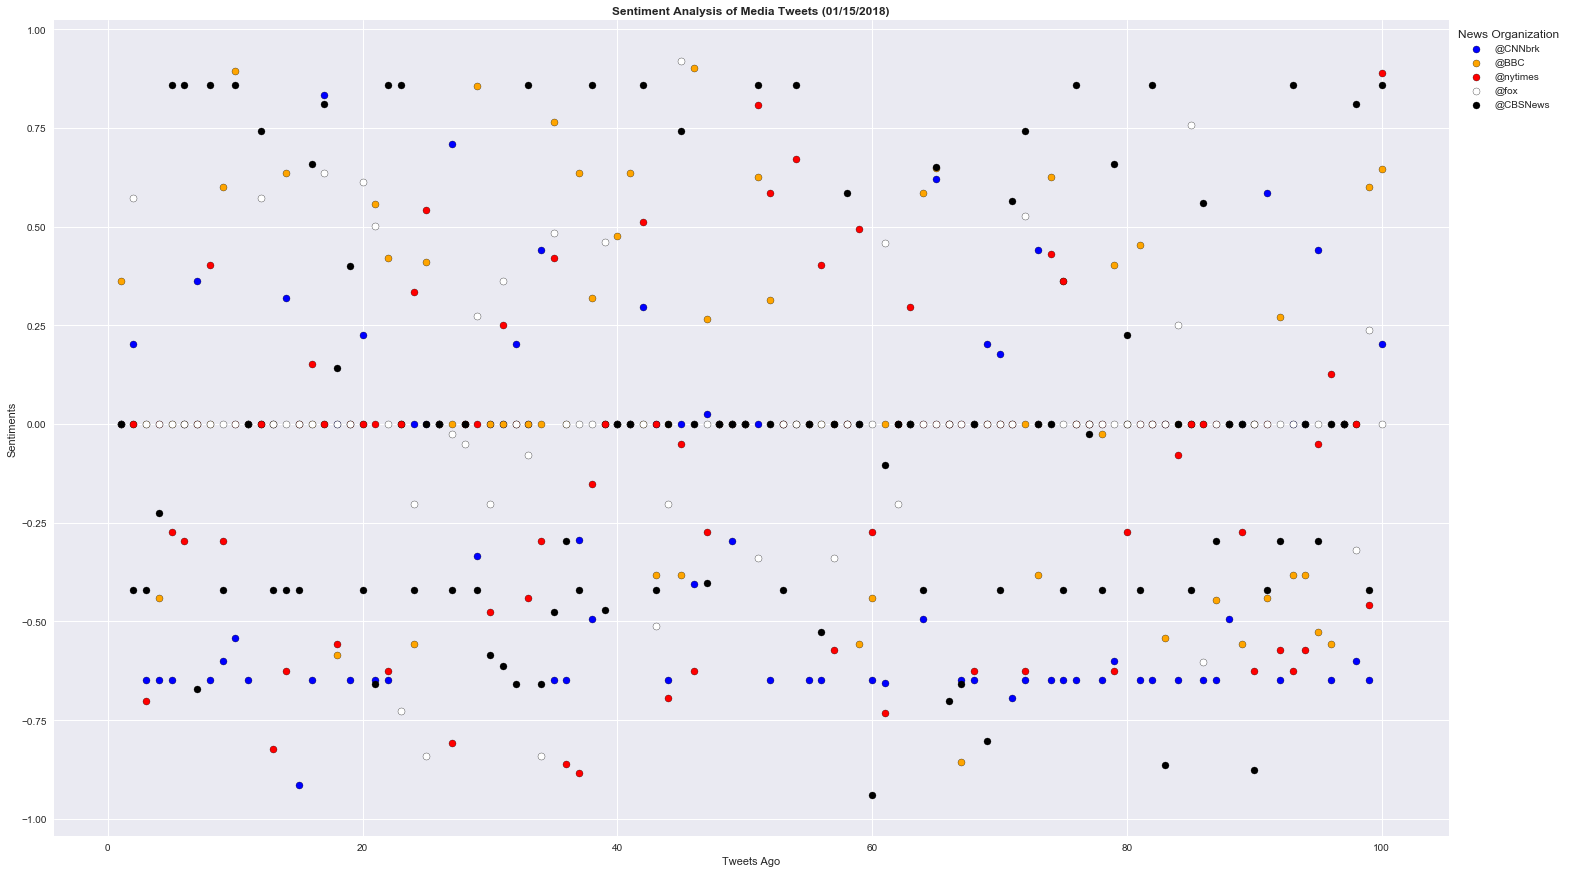

In [54]:
'''plt.figure(figsize = (25, 15))
for news in media_colors.keys():
    news_boolean
'''    
sns.set()

plt.figure(figsize = (25,15)) 
for news in media_colors.keys():
   news_boolean = df[df['news_org'] == news]
   sentiment_analysis = plt.scatter(news_boolean['tweet_count'], news_boolean['Compound_Scores'],
                                   color = media_colors[news],
                                   label = news,
                                   edgecolor= "black")

plt.xlabel("Tweets Ago")
plt.ylabel("Sentiments")
plt.title("Sentiment Analysis of Media Tweets (%s)" %(time.strftime("%m/%d/%Y")), fontweight='bold')
plt.legend(bbox_to_anchor = (1,1), title ='News Organization' )
plt.show()

sentiment_analysis.figure.savefig('SentimentAnalysis.png')    

In [ ]:
#'@CNNbrk', '@BBC', '@nytimes', '@fox', '@CBSNews'

news_org
@BBC        0.058188
@CBSNews    0.002362
@CNNbrk    -0.212385
@fox        0.021457
@nytimes   -0.090582
Name: Compound_Scores, dtype: float64
 
[0 1 2 3 4]


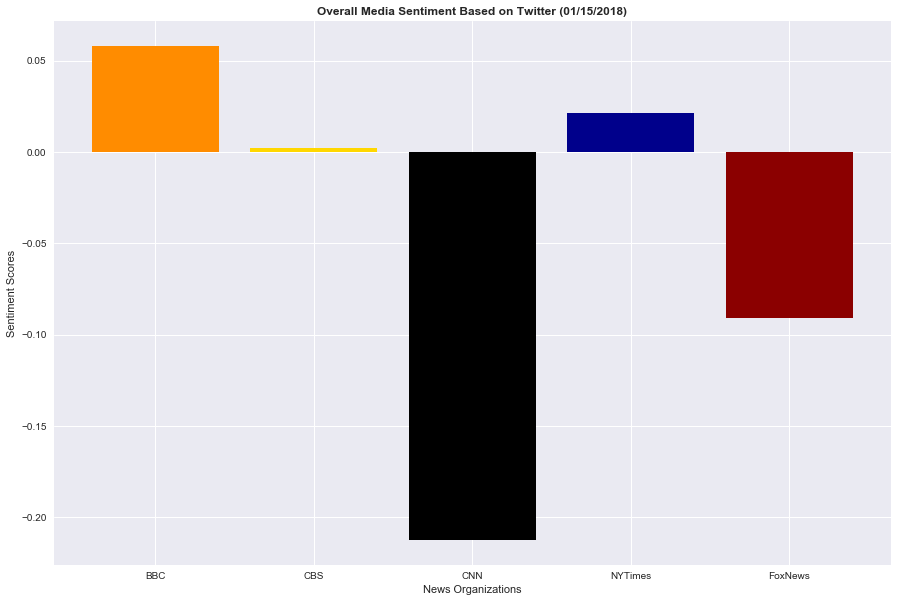

In [56]:
overall_sentiments = df.groupby("news_org")["Compound_Scores"].mean()

x_axis = np.arange(len(overall_sentiments))

print(overall_sentiments)
print(" ")
print(x_axis)


sns.set()

plt.figure(figsize=(15,10))

mean_sentiment_analysis = plt.bar(x_axis,
                                 overall_sentiments,
                                 color = {"darkred",
                                          "darkorange",
                                          "gold",
                                          "black",
                                          "darkblue"})

tick_locations = [value for value in x_axis]
tick_labels = "BBC", "CBS", "CNN", "NYTimes", "FoxNews"
plt.xticks(tick_locations, tick_labels)
plt.xlabel("News Organizations")
plt.ylabel("Sentiment Scores")
plt.title("Overall Media Sentiment Based on Twitter (%s)" %(time.strftime("%m/%d/%Y")), fontweight='bold')

plt.savefig('Overall Media Sentiment Based on Twitter.png')
   
plt.show()